In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [26]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [27]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

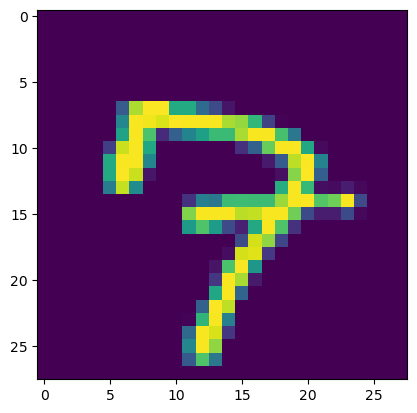

In [29]:
import matplotlib.pyplot as plt
plt.imshow(np.array(test).reshape(28000,28,28)[5])

In [30]:
train_res=(train.drop('label',axis=1)).values.reshape(-1,28,28,1)

In [31]:
train_res.shape

(42000, 28, 28, 1)

In [32]:
x_train,y_train=train_res[:(29400)],train['label'][:(29400)]
x_test,y_test=train_res[(29400):],train['label'][(29400):]

In [33]:
x_train,x_test=x_train/255,x_test/255

In [34]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding



In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [37]:
y_train1=to_categorical(y_train, num_classes = 10)
#y_train1
y_test1=to_categorical(y_test, num_classes = 10)

In [38]:
model.fit(x_train,y_train1,epochs=25,batch_size=64,validation_data=(x_test,y_test1))

Epoch 1/25


2023-08-02 10:59:17.845686: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


460/460 [==============================] - 7s 10ms/step - loss: 0.2351 - accuracy: 0.9272 - val_loss: 0.0876 - val_accuracy: 0.9810
Epoch 2/25
460/460 [==============================] - 4s 9ms/step - loss: 0.0700 - accuracy: 0.9773 - val_loss: 0.0508 - val_accuracy: 0.9848
Epoch 3/25
460/460 [==============================] - 4s 8ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0579 - val_accuracy: 0.9832
Epoch 4/25
460/460 [==============================] - 4s 8ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0457 - val_accuracy: 0.9872
Epoch 5/25
460/460 [==============================] - 4s 9ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0416 - val_accuracy: 0.9878
Epoch 6/25
460/460 [==============================] - 4s 8ms/step - loss: 0.0331 - accuracy: 0.9888 - val_loss: 0.0351 - val_accuracy: 0.9892
Epoch 7/25
460/460 [==============================] - 4s 8ms/step - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0342 - val_accuracy: 0.9900
Epoch 8/25
460/4

In [39]:
pred=model.predict(x_test)

394/394 [==============================] - 1s 2ms/step


In [40]:
preds=[]
for i in pred:
    a=np.argmax(i)
    preds.append(a)
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.9920634920634921

In [41]:
test_res=test.values.reshape(-1,28,28,1)
pred2=model.predict(test_res)

875/875 [==============================] - 2s 2ms/step


In [42]:
preds=[]
for i in pred2:
    a=np.argmax(i)
    preds.append(a)

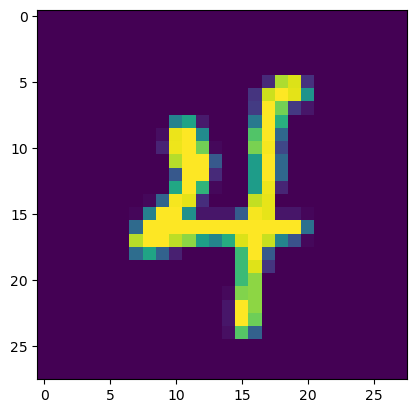

In [43]:
plt.imshow(np.array(test).reshape(28000,28,28)[2800])

In [44]:
subm=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
subm

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [45]:
subm['Label']=preds
subm.to_csv("cnn_mnist_datagen.csv",index=False)